In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [ ]:
train_path = "/content/drive/MyDrive/Imageset/Training_set"
test_path = "/content/drive/MyDrive/Imageset/Testing_set"

(250, 250)


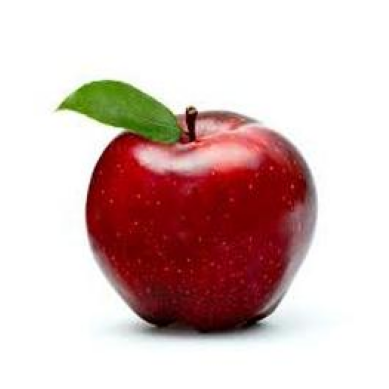

In [ ]:

img = load_img(train_path + "/DeepRed/35.jpg")
print(img.size)
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
from glob import glob
className = glob(train_path + '/*')
numberOfClass = len(className)
print("Number of Fruit Class: {}".format(numberOfClass))

Number of Fruit Class: 5


In [ ]:
import os


# Define image properties
IMG_WIDTH = 250
IMG_HEIGHT = 250
IMG_CHANNELS = 3  # RGB images
BATCH_SIZE = 32
EPOCHS = 30  # Adjust as needed
NUMBER_OF_CLASSES = 5  # Change based on your dataset

# Define paths (Modify these paths to your dataset)
TRAIN_DIR = "/content/drive/MyDrive/Imageset/Training_set"
VALID_DIR = "/content/drive/MyDrive/Imageset/Testing_set"

# 1. ImageDataGenerator for automatic image resizing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of training data used for validation
)

# Training dataset
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Automatically resizes images
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# Validation dataset
valid_generator = train_datagen.flow_from_directory(
    VALID_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# 2. CNN Model Definition
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    Activation("relu"),
    MaxPooling2D(),

    Conv2D(32, (3, 3)),
    Activation("relu"),
    MaxPooling2D(),

    Conv2D(64, (3, 3)),
    Activation("relu"),
    MaxPooling2D(),

    Flatten(),
    Dense(1024, activation="relu"),
    Dropout(0.5),
    Dense(NUMBER_OF_CLASSES, activation="softmax")
])

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# 3. Train the model
model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS
)

# 4. Save the trained model
model.save("cnn_model.h5")

# 5. Test with an individual image
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, axis=0)  # Convert to batch format

    prediction = model.predict(img_array)
    class_index = tf.argmax(prediction, axis=1).numpy()[0]

    print(f"Predicted class: {class_index}")

# Example usage:
# predict_image("path/to/test_image.jpg")

Found 199 images belonging to 5 classes.
Found 45 images belonging to 5 classes.
Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 143s 20s/step - accuracy: 0.1771 - loss: 5.1574 - val_accuracy: 0.0667 - val_loss: 1.6119
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.2828 - loss: 1.5907 - val_accuracy: 0.5111 - val_loss: 1.0883
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.3141 - loss: 1.4702 - val_accuracy: 0.5778 - val_loss: 1.0339
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.4373 - loss: 1.1931 - val_accuracy: 0.5111 - val_loss: 1.1255
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.5160 - loss: 1.0192 - val_accuracy: 0.6667 - val_loss: 0.8955
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.6252 - loss: 0.9072 - val_accuracy: 0.7778 - val_loss: 0.7307
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 34s 5s/step - accuracy: 0.5709 - loss: 0.9270 - val_accuracy: 0.6667 - val_loss: 0.8926
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step -

In [ ]:
import os
import tensorflow as tf

def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, axis=0)  # Convert to batch format

    prediction = model.predict(img_array)
    max_confidence = tf.reduce_max(prediction).numpy()

    if max_confidence < 0.5:
        print(f"Unknown image (confidence: {max_confidence:.2f})")
        return "unknown"

    class_index = tf.argmax(prediction, axis=1).numpy()[0]
    class_indices = train_generator.class_indices
    class_names = {v: k for k, v in class_indices.items()}

    class_name = class_names[class_index]
    print(f"Predicted class: {class_index}")
    print(f"Class Name: {class_name}")
    print(f"Confidence: {max_confidence:.2f}")

    if(class_name=='DeepRed'):
       print("Shelf life(weeks): 4 to 6")
       print("Sugar% : 14 to 16")
       print("Ripeness(kgf) : 6 to 8")
    elif(class_name=='RedYellow'):
       print("Shelf life(weeks): 4 to 5")
       print("Sugar% : 12 to 14")
       print("Ripeness(kgf) : 4 to 6")
    elif(class_name=='Green'):
       print("Shelf life(weeks): 6 to 8")
       print("Sugar% : 8 to 12")
       print("Ripeness(kgf) : 7 to 9")
    elif(class_name=='Bad'):
       print("Shelf life(weeks): Upto 1")
       print("Sugar% : 16+")
       print("Ripeness(kgf) : 6 to 8")
    elif(class_name=='GreenBad'):
       print("Shelf life(weeks): 1 to 2")
       print("Sugar% : 8 to 12")
       print("Ripeness(kgf) : 7 to 9")

predict_image('/content/drive/MyDrive/img.jpeg')
predict_image('/content/drive/MyDrive/redyell.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Predicted class: 2
Class Name: Green
Confidence: 1.00
Shelf life(weeks): 6 to 8
Sugar% : 8 to 12
Ripeness(kgf) : 7 to 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Predicted class: 4
Class Name: RedYellow
Confidence: 0.59
Shelf life(weeks): 4 to 5
Sugar% : 12 to 14
Ripeness(kgf) : 4 to 6
